In [12]:
using Pkg
Pkg.add("Conda")
Pkg.activate("D:\\UTD\\UTDFall2022\\VariogramsLoRa\\firmware\\LoRa")

   Resolving package versions...
  No Changes to `D:\UTD\UTDFall2022\VariogramsLoRa\firmware\LoRa\Project.toml`
  No Changes to `D:\UTD\UTDFall2022\VariogramsLoRa\firmware\LoRa\Manifest.toml`
  Activating project at `D:\UTD\UTDFall2022\VariogramsLoRa\firmware\LoRa`


In [14]:
using CSV,DataFrames,Dates,Statistics,DataStructures,Plots,TimeSeries,Impute,LaTeXStrings,FFTW,StatsBase,Statistics,Polynomials,Roots,PyCall,Conda

In [4]:
py"""
def add20(x):
    return x + 20
"""
py"add20"(20)


40

In [59]:
Conda.add("matplotlib")

┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda C:\Users\balag\.julia\packages\Conda\x2UxR\src\Conda.jl:127


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [60]:
matplotlib = pyimport("matplotlib")
%matplotlib inline

LoadError: syntax: "%" is not a unary operator

In [17]:
Conda.add("kneed",; channel="conda-forge")

┌ Info: Running `conda install -y -c conda-forge kneed` in root environment
└ @ Conda C:\Users\balag\.julia\packages\Conda\x2UxR\src\Conda.jl:127


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\balag\.julia\conda\3

  added / updated specs:
    - kneed


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.1.0               |     pyhd8ed1ab_0         210 KB  conda-forge
    kneed-0.7.0                |     pyh9f0ad1d_0          12 KB  conda-forge
    m2w64-gcc-libgfortran-5.3.0|                6         342 KB  conda-forge
    m2w64-gcc-libs-5.3.0       |                7         520 KB  conda-forge
    m2w64-gcc-libs-core-5.3.0  |                7         214 KB  conda-forge
    m2w64-gmp-6.1.0            |                2         726 KB  conda-forge
    m2w64-libwinpthread-git-5.0.0.4634.697f757|                2          31 KB  conda-forge
    msys2-conda-epoch-20160418 |                1           3 KB  conda-forge
    scikit-learn-1.1.2         |   py39hfd4428b_0         7.6 

In [18]:
kneed = pyimport("kneed")

PyObject <module 'kneed' from 'C:\\Users\\balag\\.julia\\conda\\3\\lib\\site-packages\\kneed\\__init__.py'>

# ----------------- Central Node 001e06305a61 at WSTC for Jan 23rd --------------------

# With Imputed Data

## Rounding the Data to the Nearest Second

In [25]:
data_frame = CSV.read("D://UTD//UTDFall2022//VariogramsLoRa//firmware//data//MINTS_001e06305a61_IPS7100_2022_01_23.csv",DataFrame)
ms = [parse(Float64,x[20:26]) for x in data_frame[!,:dateTime]]
data_frame.ms  = Second.(round.(Int,ms))
data_frame.dateTime = [x[1:19] for x in data_frame[!,:dateTime]]
data_frame.dateTime = DateTime.(data_frame.dateTime,"yyyy-mm-dd HH:MM:SS")
data_frame.dateTime = data_frame.dateTime + data_frame.ms
data_frame = select!(data_frame, Not(:ms))
col_symbols = Symbol.(names(data_frame))
data_frame = DataFrames.combine(DataFrames.groupby(data_frame, :dateTime), col_symbols[2:15] .=> mean)

86017×15 DataFrame
   Row │ dateTime             pc0_1_mean  pc0_3_mean  pc0_5_mean  pc1_0_mean   ⋯
       │ DateTime             Float64     Float64     Float64     Float64      ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 2022-01-23T00:00:01    137573.0     74929.0     28497.0      3636.0   ⋯
     2 │ 2022-01-23T00:00:02    137294.0     74800.0     28473.0      3634.0
     3 │ 2022-01-23T00:00:03    137078.0     74712.0     28503.0      3640.0
     4 │ 2022-01-23T00:00:04    136826.0     74581.0     28490.0      3642.0
     5 │ 2022-01-23T00:00:05    136556.0     74435.0     28470.0      3645.0   ⋯
     6 │ 2022-01-23T00:00:06    136068.0     74064.0     28432.0      3645.0
     7 │ 2022-01-23T00:00:07    135505.0     73668.0     28419.0      3651.0
     8 │ 2022-01-23T00:00:08    134947.0     73284.0     28450.0      3665.0
     9 │ 2022-01-23T00:00:09    134422.0     72927.0     28484.0      3680.0   ⋯
    10 │ 2022-01-23T00:00:10    133888.0     72543.0     28493.0      3690.0
    11 │ 2022-01-23T00:00:11    133323.0     72150.0     28448.0      3690.0
   ⋮   │          ⋮               ⋮           ⋮           ⋮           ⋮        ⋱
 86008 │ 2022-01-23T23:59:50     30306.0     14396.0      2094.0       268.0
 86009 │ 2022-01-23T23:59:51     30453.0     14459.0      2112.0       273.0   ⋯
 86010 │ 2022-01-23T23:59:52     30689.0     14586.0      2138.0       280.0
 86011 │ 2022-01-23T23:59:53     30946.0     14714.0      2168.0       288.0
 86012 │ 2022-01-23T23:59:54     31150.0     14808.0      2196.0       296.0
 86013 │ 2022-01-23T23:59:55     31271.0     14864.0      2225.0       304.0   ⋯
 86014 │ 2022-01-23T23:59:56     31321.0     14889.0      2251.0       311.0
 86015 │ 2022-01-23T23:59:57     31498.0     14999.0      2309.0       323.0
 86016 │ 2022-01-23T23:59:58     31737.0     15143.0      2378.0       336.0
 86017 │ 2022-01-23T23:59:59     32016.0     15300.0      2459.0       349.0   ⋯
                                               10 columns and 85996 rows omitted

# Seasonality

In [26]:
df = data_frame
df = DataFrames.rename!(df, col_symbols)
names(df)

15-element Vector{String}:
 "dateTime"
 "pc0_1"
 "pc0_3"
 "pc0_5"
 "pc1_0"
 "pc2_5"
 "pc5_0"
 "pc10_0"
 "pm0_1"
 "pm0_3"
 "pm0_5"
 "pm1_0"
 "pm2_5"
 "pm5_0"
 "pm10_0"

In [27]:
date_time_rounded = map((x) -> round(x, Dates.Hour(1)), df.dateTime)  
df_agg = select(df,Not(:dateTime))
df_agg.date_time_rounded  = date_time_rounded 
gdf_date_time =  groupby(df_agg, :date_time_rounded)
resampled_timeseries_data = combine(gdf_date_time, valuecols(gdf_date_time) .=> mean)
resampled_timeseries_data = DataFrames.rename!(resampled_timeseries_data, col_symbols)

25×15 DataFrame
 Row │ dateTime             pc0_1           pc0_3          pc0_5          pc1_ ⋯
     │ DateTime             Float64         Float64        Float64        Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2022-01-23T00:00:00       1.32831e5  72035.8        29070.8         397 ⋯
   2 │ 2022-01-23T01:00:00       1.46602e5  79307.0        39395.5         496
   3 │ 2022-01-23T02:00:00       1.75911e5  95876.3        55943.4         658
   4 │ 2022-01-23T03:00:00       1.71945e5  93989.9        55509.4         664
   5 │ 2022-01-23T04:00:00  194336.0            1.07613e5  75406.1         864 ⋯
   6 │ 2022-01-23T05:00:00       2.22368e5      1.26366e5      1.2181e5   1359
   7 │ 2022-01-23T06:00:00       2.18371e5      1.23475e5      1.17996e5  1296
   8 │ 2022-01-23T07:00:00       2.0885e5       1.16229e5      1.04979e5  1122
   9 │ 2022-01-23T08:00:00       1.98429e5      1.09358e5  86979.5         940 ⋯
  10 │ 2022-01-23T09:00:00       1.96604e5      1.08064e5  79472.7         919
  11 │ 2022-01-23T10:00:00       1.58763e5  85861.7        46828.9         613
  ⋮  │          ⋮                 ⋮               ⋮              ⋮             ⋱
  16 │ 2022-01-23T15:00:00       1.58361e5  86167.0        47391.9         635
  17 │ 2022-01-23T16:00:00       1.2256e5   66065.3        28946.2         370 ⋯
  18 │ 2022-01-23T17:00:00       1.01591e5  54350.6        20107.5         272
  19 │ 2022-01-23T18:00:00   50872.5        25901.4         5919.62         80
  20 │ 2022-01-23T19:00:00   31625.0        15576.5         2377.39         30
  21 │ 2022-01-23T20:00:00   54595.4        28199.9         6678.84         96 ⋯
  22 │ 2022-01-23T21:00:00   32916.1        16481.2         2789.3          36
  23 │ 2022-01-23T22:00:00   31003.1        15130.7         2186.91         28
  24 │ 2022-01-23T23:00:00   30140.4        14650.6         2005.78         26
  25 │ 2022-01-24T00:00:00   33624.9        16656.8         2401.88         32 ⋯
                                                   11 columns and 4 rows omitted

In [28]:
cols = Symbol.([["dateTime"]; col_symbols[9:15]])

8-element Vector{Symbol}:
 :dateTime
 :pm0_1
 :pm0_3
 :pm0_5
 :pm1_0
 :pm2_5
 :pm5_0
 :pm10_0

In [29]:
df_hourly = hcat(resampled_timeseries_data.dateTime,resampled_timeseries_data[:,9:15])
df_hourly = DataFrames.rename!(df_hourly, cols)

25×8 DataFrame
 Row │ dateTime             pm0_1      pm0_3     pm0_5      pm1_0      pm2_5   ⋯
     │ DateTime             Float64    Float64   Float64    Float64    Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2022-01-23T00:00:00  0.110988   1.73613    4.77233    8.09167   19.392  ⋯
   2 │ 2022-01-23T01:00:00  0.122495   1.91167    6.02619   10.1767    23.5084
   3 │ 2022-01-23T02:00:00  0.146985   2.30997    8.15275   13.6545    31.7836
   4 │ 2022-01-23T03:00:00  0.14367    2.26409    8.06155   13.6115    31.4008
   5 │ 2022-01-23T04:00:00  0.16238    2.59013   10.4656    17.6889    41.2702 ⋯
   6 │ 2022-01-23T05:00:00  0.185802   3.03664   15.7586    27.1195    66.2194
   7 │ 2022-01-23T06:00:00  0.182462   2.96806   15.2916    26.1275    61.9443
   8 │ 2022-01-23T07:00:00  0.174507   2.79664   13.7608    23.1374    54.2498
   9 │ 2022-01-23T08:00:00  0.1658     2.63293   11.7171    19.5742    46.5812 ⋯
  10 │ 2022-01-23T09:00:00  0.164275   2.60222   10.9024    18.5835    45.0033
  11 │ 2022-01-23T10:00:00  0.132656   2.06971    6.96057   12.0841    29.1593
  ⋮  │          ⋮               ⋮         ⋮          ⋮          ⋮         ⋮    ⋱
  16 │ 2022-01-23T15:00:00  0.13232    2.07626    7.02592   12.3394    30.5145
  17 │ 2022-01-23T16:00:00  0.102407   1.59285    4.61605    7.70995   18.1016 ⋯
  18 │ 2022-01-23T17:00:00  0.0848861  1.31105    3.41113    5.6881    13.6443
  19 │ 2022-01-23T18:00:00  0.0425074  0.626854   1.24515    1.92007    4.5388
  20 │ 2022-01-23T19:00:00  0.026425   0.377841   0.626189   0.883067   1.9725
  21 │ 2022-01-23T20:00:00  0.0456181  0.68182    1.37941    2.19017    5.2986 ⋯
  22 │ 2022-01-23T21:00:00  0.0275038  0.39933    0.690698   0.997304   2.3130
  23 │ 2022-01-23T22:00:00  0.0259054  0.367264   0.595718   0.836997   1.9408
  24 │ 2022-01-23T23:00:00  0.0251845  0.355713   0.56525    0.783994   1.8218
  25 │ 2022-01-24T00:00:00  0.0280961  0.403884   0.654789   0.925026   2.1628 ⋯
                                                    3 columns and 4 rows omitted

In [30]:
strpm0_1 = "PM"*latexstring("_{0.1}")
strpm0_3 = "PM"*latexstring(" _{0.3}")
strpm0_5 = "PM"*latexstring("_{0.5}")
strpm1_0 = "PM"*latexstring("_{1.0}")
strpm2_5 = "PM"*latexstring("_{2.5}")
strpm5_0 = "PM"*latexstring("_{5.0}")
strpm10_0 = "PM"*latexstring("_{10.0}")

"PM\$_{10.0}\$"

In [31]:
ylab = "(μg/cm3)"#*latexstring("_{0.1}")

"(μg/cm3)"

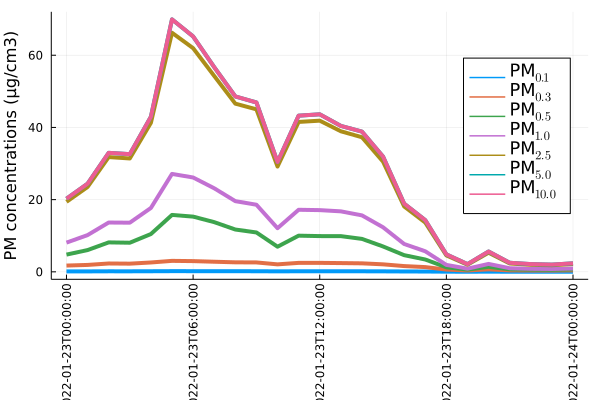

In [32]:
plot!(df_hourly.dateTime,df_hourly.pm0_1, xlabel = "DateTime " , ylabel = "PM concentrations "*ylab, label = strpm0_1, legend = :right, linewidth=4, legendfontsize=12, xrotation = 90)
plot!(df_hourly.dateTime,df_hourly.pm0_3, xlabel = "DateTime " , ylabel = "PM concentrations" *ylab, label = strpm0_3, legend = :right, linewidth=4, legendfontsize=12,xrotation = 90)
plot!(df_hourly.dateTime,df_hourly.pm0_5, xlabel = "DateTime " , ylabel = "PM concentrations "*ylab, label = strpm0_5,  legend = :right, linewidth=4, legendfontsize=12,xrotation = 90)
plot!(df_hourly.dateTime,df_hourly.pm1_0, xlabel = "DateTime " , ylabel = "PM concentrations "*ylab, label = strpm1_0,  legend = :right, linewidth=4, legendfontsize=12, xrotation = 90)
plot!(df_hourly.dateTime,df_hourly.pm2_5, xlabel = "DateTime " , ylabel = "PM concentrations "*ylab, label = strpm2_5,  legend = :right, linewidth=4, legendfontsize=12, xrotation = 90)
plot!(df_hourly.dateTime,df_hourly.pm5_0, xlabel = "DateTime " , ylabel = "PM concentrations "*ylab, label = strpm5_0,  legend = :right, linewidth=4, legendfontsize=12, xrotation = 90)
plot!(df_hourly.dateTime,df_hourly.pm10_0, xlabel = "DateTime " , ylabel = "PM concentrations "*ylab, label = strpm10_0,  legend = :right, linewidth=4, legendfontsize=12, xrotation = 90)

## Imputing the empty spaces with the Nearest Value

In [33]:
col_symbols[9:15]

7-element Vector{Symbol}:
 :pm0_1
 :pm0_3
 :pm0_5
 :pm1_0
 :pm2_5
 :pm5_0
 :pm10_0

In [34]:
df = data_frame
###################Some issue with imputation logic, need to fix it
df = DataFrame()
df.dateTime = collect(data_frame.dateTime[1]:Second(1):data_frame.dateTime[length(data_frame.dateTime)])
df = outerjoin( df,data_frame, on = :dateTime)
df = DataFrames.rename!(df, col_symbols)
df = Impute.locf(df)

86399×15 DataFrame
   Row │ dateTime             pc0_1     pc0_3     pc0_5     pc1_0     pc2_5    ⋯
       │ DateTime             Float64?  Float64?  Float64?  Float64?  Float64? ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 2022-01-23T00:00:01  137573.0   74929.0   28497.0    3636.0     856.0 ⋯
     2 │ 2022-01-23T00:00:02  137294.0   74800.0   28473.0    3634.0     864.0
     3 │ 2022-01-23T00:00:03  137078.0   74712.0   28503.0    3640.0     875.0
     4 │ 2022-01-23T00:00:04  136826.0   74581.0   28490.0    3642.0     888.0
     5 │ 2022-01-23T00:00:05  136556.0   74435.0   28470.0    3645.0     904.0 ⋯
     6 │ 2022-01-23T00:00:06  136068.0   74064.0   28432.0    3645.0     925.0
     7 │ 2022-01-23T00:00:07  135505.0   73668.0   28419.0    3651.0     949.0
     8 │ 2022-01-23T00:00:08  134947.0   73284.0   28450.0    3665.0     975.0
     9 │ 2022-01-23T00:00:09  134422.0   72927.0   28484.0    3680.0    1001.0 ⋯
    10 │ 2022-01-23T00:00:10  133888.0   72543.0   28493.0    3690.0    1026.0
    11 │ 2022-01-23T00:00:11  133323.0   72150.0   28448.0    3690.0    1045.0
   ⋮   │          ⋮              ⋮         ⋮         ⋮         ⋮         ⋮     ⋱
 86390 │ 2022-01-23T16:47:01   32016.0   15300.0    2459.0     349.0      94.0
 86391 │ 2022-01-23T17:24:32   32016.0   15300.0    2459.0     349.0      94.0 ⋯
 86392 │ 2022-01-23T19:52:16   32016.0   15300.0    2459.0     349.0      94.0
 86393 │ 2022-01-23T19:52:27   32016.0   15300.0    2459.0     349.0      94.0
 86394 │ 2022-01-23T19:56:06   32016.0   15300.0    2459.0     349.0      94.0
 86395 │ 2022-01-23T19:56:10   32016.0   15300.0    2459.0     349.0      94.0 ⋯
 86396 │ 2022-01-23T19:58:01   32016.0   15300.0    2459.0     349.0      94.0
 86397 │ 2022-01-23T19:59:00   32016.0   15300.0    2459.0     349.0      94.0
 86398 │ 2022-01-23T21:53:04   32016.0   15300.0    2459.0     349.0      94.0
 86399 │ 2022-01-23T21:53:05   32016.0   15300.0    2459.0     349.0      94.0 ⋯
                                                9 columns and 86378 rows omitted

In [35]:
df_mat = select!(df, Not(col_symbols[1:8]))
mat_updated =  Array{Float64}(undef, 0, 7)

0×7 Matrix{Float64}

## Calculating the Empirical Variogram

In [36]:
mat = Matrix(df_mat)
mat_head = mat[1:43200,:]

43200×7 Matrix{Union{Missing, Float64}}:
 0.114951  1.80537   4.78165   7.82057  19.0054  19.7206  19.7206
 0.114718  1.80223   4.77596   7.81252  19.1029  20.15    20.15
 0.114538  1.80005   4.77695   7.819    19.2556  20.5386  20.5386
 0.114327  1.79688   4.77244   7.81573  19.4235  21.1342  21.1342
 0.114101  1.79336   4.76685   7.81304  19.6265  21.5546  21.5546
 0.113693  1.78458   4.75403   7.79983  19.8817  22.2965  22.2965
 0.113223  1.77518   4.74332   7.79404  20.19    22.9403  22.9403
 0.112757  1.76605   4.73746   7.80049  20.5419  23.6535  23.6535
 0.112318  1.75757   4.73251   7.80761  20.8921  24.1955  24.1955
 0.111872  1.74846   4.72428   7.80767  21.2118  24.2608  24.2608
 0.1114    1.7391    4.71026   7.79377  21.4539  24.2891  24.2891
 0.110938  1.72982   4.6991    7.78547  21.6407  23.6684  23.6684
 0.110453  1.7196    4.68675   7.77472  21.7793  23.1803  23.1803
 ⋮                                                ⋮       
 0.16382   2.55002  11.7299   19.352    48.5

In [37]:
mat = Matrix(df_mat)
for h in 1:1:7200
    mat_head = mat[1:43200,:]
    mat_tail = mat[(h+1):(43200+h),:]
    diff_mat = (mat_head - mat_tail).^2
    mat_updated =  vcat(mat_updated,sum(diff_mat,dims=1))
end

In [38]:
mat_updated  = hcat(collect(1:1:7200)./60,mat_updated)

7200×8 Matrix{Float64}:
   0.0166667   0.044495     11.9717  …  26561.0         26594.8
   0.0333333   0.169757     45.7114     91992.9         92091.9
   0.05        0.36141      97.359          1.82441e5       1.82635e5
   0.0666667   0.605038    163.044          2.9101e5   291290.0
   0.0833333   0.88653     238.975          4.1095e5        4.11283e5
   0.1         1.19199     321.411   …      5.32357e5       5.32738e5
   0.116667    1.50764     406.636          6.45776e5  646186.0
   0.133333    1.81993     490.998          7.53426e5       7.53854e5
   0.15        2.11873     571.753          8.55575e5       8.56021e5
   0.166667    2.4019      648.321          9.51631e5       9.52095e5
   0.183333    2.67057     720.986   …      1.04215e6       1.04263e6
   0.2         2.92582     790.032          1.12732e6       1.12781e6
   0.216667    3.16857     855.698          1.20734e6       1.20784e6
   ⋮                                 ⋱                 
 119.817      38.5337    11433.4  

In [39]:
γ = DataFrame(mat_updated,:auto)
n = [["Δt"];names(df)]
DataFrames.rename!(γ,n)

7200×8 DataFrame
  Row │ Δt           pm0_1      pm0_3       pm0_5          pm1_0           pm2 ⋯
      │ Float64      Float64    Float64     Float64        Float64         Flo ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │   0.0166667   0.044495     11.9717    727.867        2036.67        13 ⋯
    2 │   0.0333333   0.169757     45.7114   2788.33         7788.87        52
    3 │   0.05        0.36141      97.359    5956.92        16604.8
    4 │   0.0666667   0.605038    163.044   10006.7         27827.9
    5 │   0.0833333   0.88653     238.975   14713.2         40813.2            ⋯
    6 │   0.1         1.19199     321.411   19855.7         54927.8
    7 │   0.116667    1.50764     406.636   25216.9         69551.8
    8 │   0.133333    1.81993     490.998   30584.3         84080.5
    9 │   0.15        2.11873     571.753   35797.6         98063.4            ⋯
   10 │   0.166667    2.4019      648.321   40819.9             1.11407e5  741
   11 │   0.183333    2.67057     720.986   45665.3             1.24167e5
  ⋮   │      ⋮           ⋮          ⋮             ⋮              ⋮             ⋱
 7191 │ 119.85       38.5165    11427.9         9.10295e5       2.53888e6
 7192 │ 119.867      38.5068    11424.9         9.10186e5       2.53858e6      ⋯
 7193 │ 119.883      38.4968    11421.8         9.10076e5       2.53828e6
 7194 │ 119.9        38.4869    11418.7         9.09972e5       2.538e6
 7195 │ 119.917      38.4776    11415.8         9.09879e5       2.53773e6
 7196 │ 119.933      38.469     11413.0         9.09801e5       2.53748e6      ⋯
 7197 │ 119.95       38.4615    11410.5         9.09744e5       2.53728e6
 7198 │ 119.967      38.4554    11408.4         9.09713e5       2.53711e6
 7199 │ 119.983      38.4511    11406.7         9.09714e5       2.53702e6
 7200 │ 120.0        38.449     11405.6         9.09748e5       2.537e6        ⋯
                                                 3 columns and 7179 rows omitted

In [71]:
knee = kneed.KneeLocator(γ.Δt,γ.pm0_1, S=1.0, curve="convex", direction="increasing", interp_method="interp1d")

PyObject <kneed.knee_locator.KneeLocator object at 0x000000009757FCA0>

In [73]:
knee.elbow_y

38.4490046248217

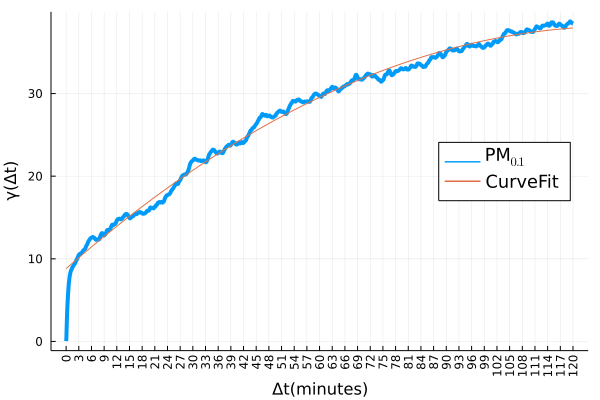

8.81187 + 0.448108*x - 0.00171183*x^2


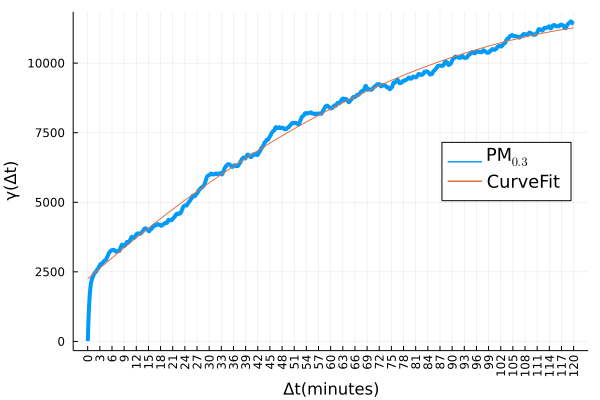

2246.01 + 128.389*x - 0.443323*x^2


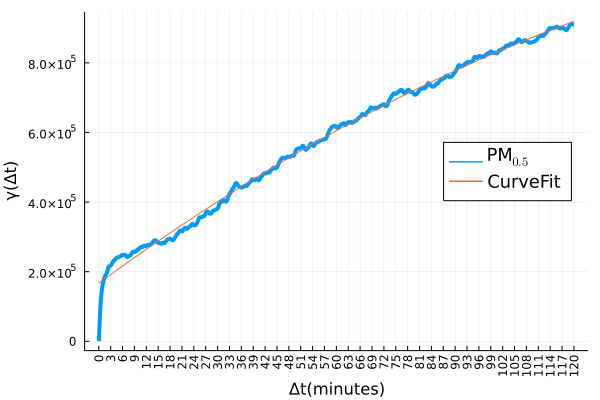

1.6686e5 + 8325.78*x - 17.147*x^2


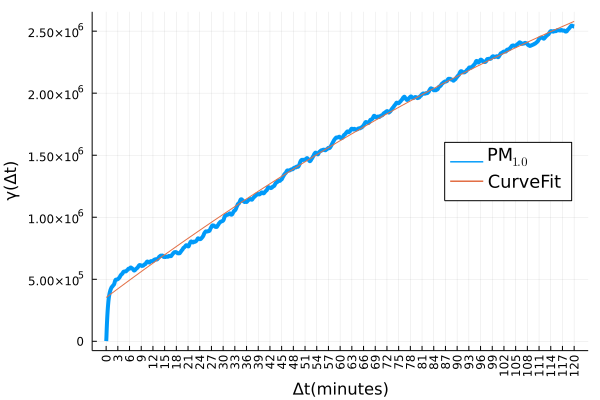

3.53145e5 + 23596.5*x - 42.0968*x^2


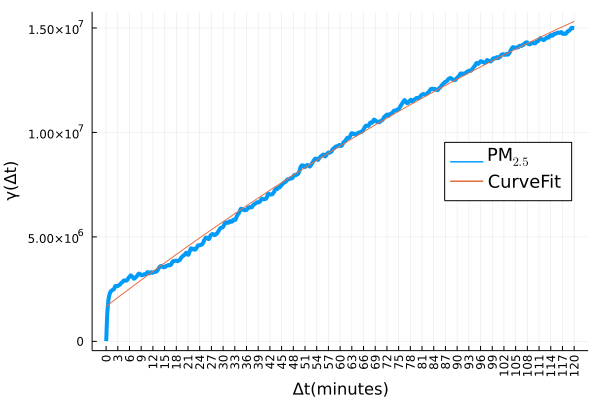

1.671e6 + 1.42508e5*x - 240.137*x^2


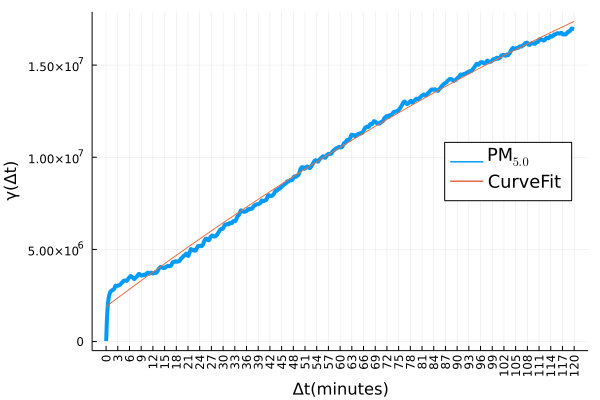

1.89494e6 + 1.591e5*x - 251.188*x^2


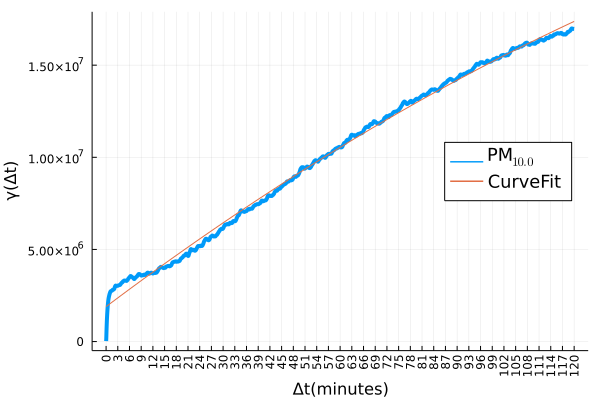

1.8954e6 + 1.59127e5*x - 251.165*x^2


In [45]:
strpm0_1 = "PM"*latexstring("_{0.1}")
strpm0_3 = "PM"*latexstring(" _{0.3}")
strpm0_5 = "PM"*latexstring("_{0.5}")
strpm1_0 = "PM"*latexstring("_{1.0}")
strpm2_5 = "PM"*latexstring("_{2.5}")
strpm5_0 = "PM"*latexstring("_{5.0}")
strpm10_0 = "PM"*latexstring("_{10.0}")

plot(γ.Δt,γ.pm0_1,xlabel ="Δt(minutes)" ,ylabel= "γ(Δt)",legend=:right ,linewidth=4, legendfontsize=12,label=strpm0_1,xticks= 0:3:120, xrotation = 90)
display(plot!(Polynomials.fit(γ.Δt,γ.pm0_1,2),γ.Δt[1],γ.Δt[end],label = "CurveFit"))
println(Polynomials.fit(γ.Δt,γ.pm0_1,2))
plot(γ.Δt,γ.pm0_3,xlabel ="Δt(minutes)" ,ylabel= "γ(Δt)" ,legend=:right,linewidth=4, legendfontsize=12,label=strpm0_3,xticks= 0:3:120, xrotation = 90)
display(plot!(Polynomials.fit(γ.Δt,γ.pm0_3,2),γ.Δt[1],γ.Δt[end],label = "CurveFit"))
println(Polynomials.fit(γ.Δt,γ.pm0_3,2))
plot(γ.Δt,γ.pm0_5,xlabel ="Δt(minutes)" ,ylabel= "γ(Δt)" ,legend=:right,linewidth=4, legendfontsize=12,label=strpm0_5,xticks= 0:3:120, xrotation = 90)
display(plot!(Polynomials.fit(γ.Δt,γ.pm0_5,2),γ.Δt[1],γ.Δt[end],label = "CurveFit"))
println(Polynomials.fit(γ.Δt,γ.pm0_5,2))
plot(γ.Δt,γ.pm1_0,xlabel ="Δt(minutes)" ,ylabel= "γ(Δt)" ,legend=:right,linewidth=4, legendfontsize=12,label=strpm1_0,xticks= 0:3:120, xrotation = 90)
display(plot!(Polynomials.fit(γ.Δt,γ.pm1_0,2),γ.Δt[1],γ.Δt[end],label = "CurveFit"))
println(Polynomials.fit(γ.Δt,γ.pm1_0,2))
plot(γ.Δt,γ.pm2_5,xlabel ="Δt(minutes)" ,ylabel= "γ(Δt)" ,legend=:right,linewidth=4, legendfontsize=12,label=strpm2_5,xticks= 0:3:120, xrotation = 90)
display(plot!(Polynomials.fit(γ.Δt,γ.pm2_5,2),γ.Δt[1],γ.Δt[end],label = "CurveFit"))
println(Polynomials.fit(γ.Δt,γ.pm2_5,2))
plot(γ.Δt,γ.pm5_0,xlabel ="Δt(minutes)" ,ylabel= "γ(Δt)" ,legend=:right,linewidth=4, legendfontsize=12,label=strpm5_0,xticks= 0:3:120, xrotation = 90)
display(plot!(Polynomials.fit(γ.Δt,γ.pm5_0,2),γ.Δt[1],γ.Δt[end],label = "CurveFit"))
println(Polynomials.fit(γ.Δt,γ.pm5_0,2))
plot(γ.Δt,γ.pm10_0,xlabel ="Δt(minutes)" ,ylabel= "γ(Δt)" ,legend=:right,linewidth=4, legendfontsize=12,label=strpm10_0,xticks= 0:3:120, xrotation = 90)
display(plot!(Polynomials.fit(γ.Δt,γ.pm10_0,2),γ.Δt[1],γ.Δt[end],label = "CurveFit"))
println(Polynomials.fit(γ.Δt,γ.pm10_0,2))

In [46]:
dydx_pm0_1 = derivative(Polynomials.fit(γ.Δt,γ.pm0_1,2))
dydx_pm0_3 = derivative(Polynomials.fit(γ.Δt,γ.pm0_3,2))
dydx_pm0_5 = derivative(Polynomials.fit(γ.Δt,γ.pm0_5,2))
dydx_pm1_0 = derivative(Polynomials.fit(γ.Δt,γ.pm1_0,2))
dydx_pm2_5 = derivative(Polynomials.fit(γ.Δt,γ.pm2_5,2))
dydx_pm5_0 = derivative(Polynomials.fit(γ.Δt,γ.pm5_0,2))
dydx_pm10_0 = derivative(Polynomials.fit(γ.Δt,γ.pm10_0,2))


Polynomial(159126.6222046891 - 502.32978134747435*x)

In [47]:
x_pm0_1 = find_zero(dydx_pm0_1,0)
x_pm0_3 = find_zero(dydx_pm0_3,0)
x_pm0_5 = find_zero(dydx_pm0_5,0)
x_pm1_0 = find_zero(dydx_pm1_0,0)
x_pm2_5 = find_zero(dydx_pm2_5,0)
x_pm5_0 = find_zero(dydx_pm5_0,0)
x_pm10_0 = find_zero(dydx_pm10_0,0)

316.77720118014895

In [48]:
y1 = Polynomials.fit(γ.Δt,γ.pm0_1,2)(x_pm0_1)

38.137355742473616

In [56]:
pol1 = Polynomials.fit(γ.Δt,γ.pm0_1,2)-y1

Polynomial(-29.32548235075543 + 0.4481084223900547*x - 0.0017118316743708311*x^2)

In [57]:
find_zero(pol1,0)

130.88565046358744


# Autocovariance function Implementation of the data

Using identity function to convert the AbstractVector from{missing,Float64} to AbstractVector {Float64}


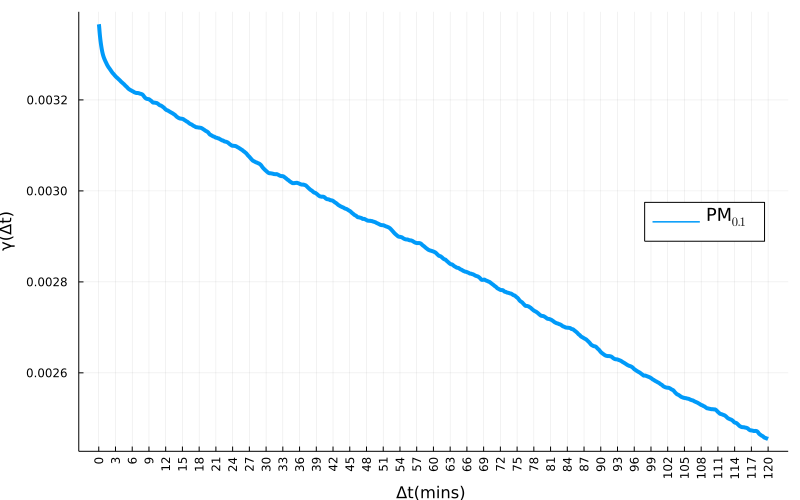

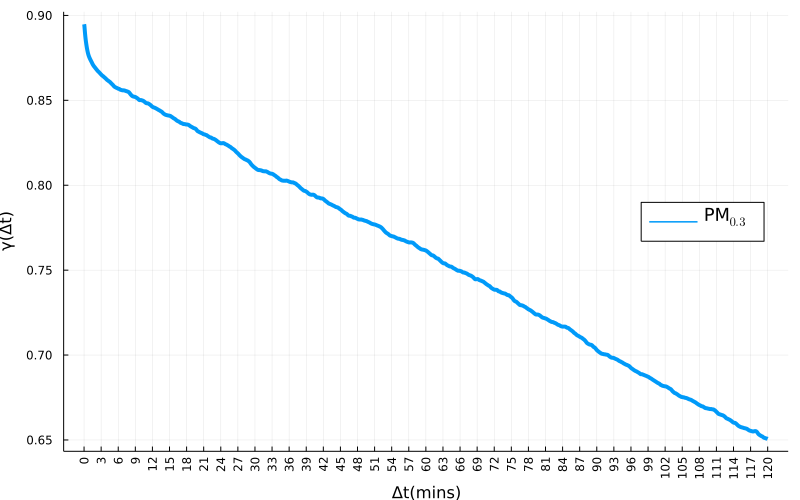

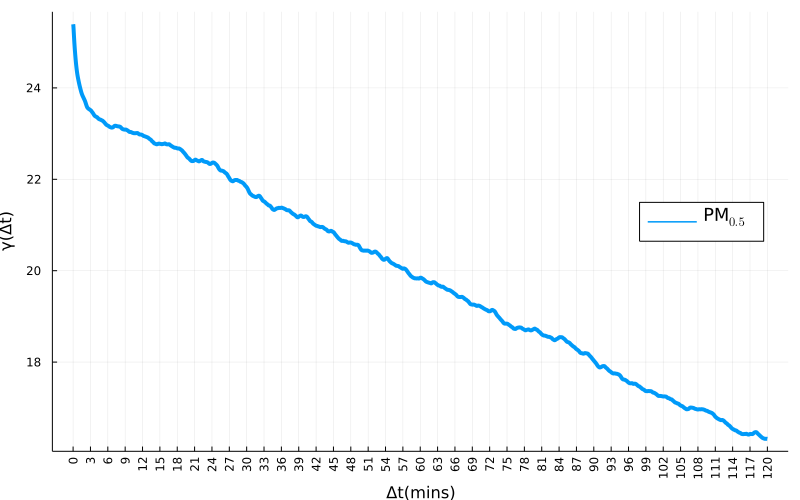

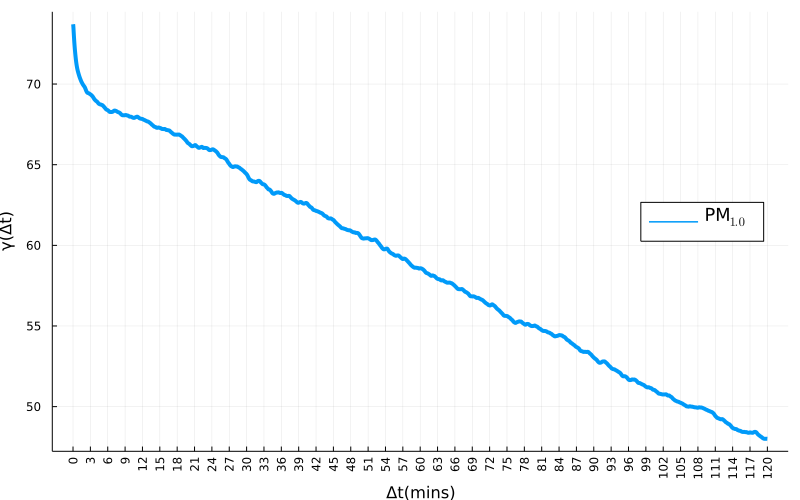

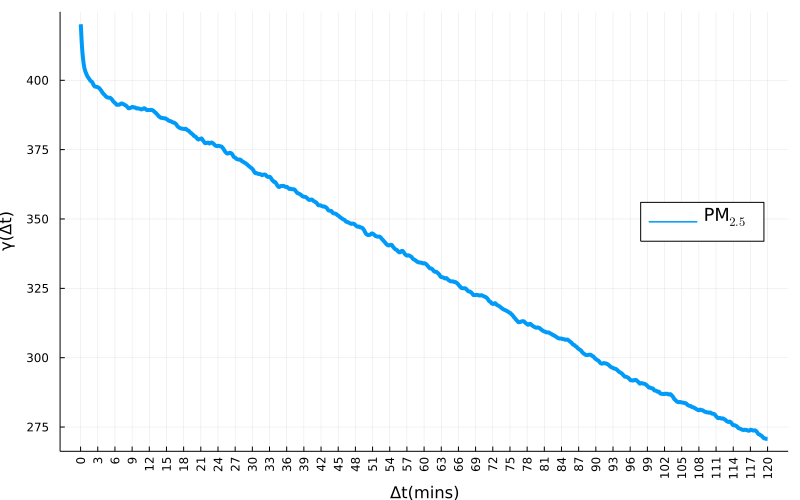

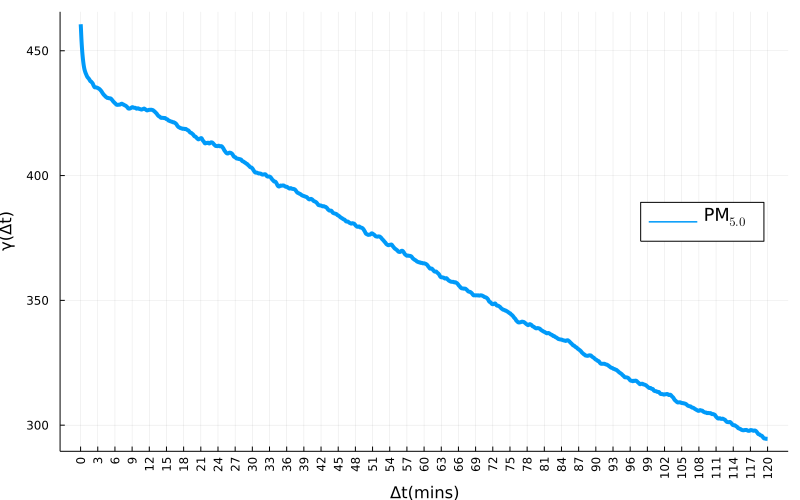

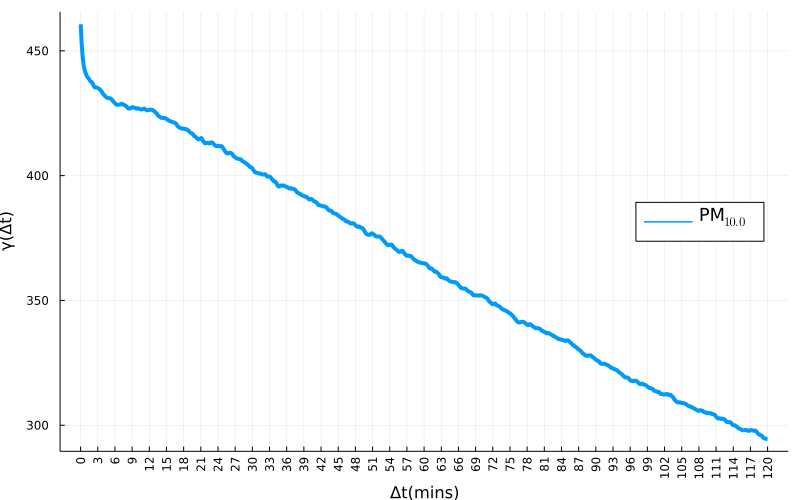

In [74]:
mat_autocov = autocov(identity.(mat),collect(1:1:7200))
mat_autocov_updated  = hcat(collect(1:1:7200)./60,mat_autocov)

γ_autocov = DataFrame(mat_autocov_updated,:auto)
n_autocov = [["Δt"];names(df)]
DataFrames.rename!(γ_autocov,n_autocov)

display(plot(γ_autocov.Δt,γ_autocov.pm0_1, xlabel = "Δt(mins) " , ylabel = "γ(Δt)", label = strpm0_1, legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ_autocov.Δt,γ_autocov.pm0_3, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm0_3, legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ_autocov.Δt,γ_autocov.pm0_5, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm0_5,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ_autocov.Δt,γ_autocov.pm1_0, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm1_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ_autocov.Δt,γ_autocov.pm2_5, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm2_5,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ_autocov.Δt,γ_autocov.pm5_0, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm5_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ_autocov.Δt,γ_autocov.pm10_0, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm10_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))

In [ ]:
display(plot(γ.Δt[1:3600],γ.pm0_1[1:3600], xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm0_1, legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt[1:3600],γ.pm0_3[1:3600], xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm0_3, legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt[1:3600],γ.pm0_5[1:3600], xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm0_5,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt[1:3600],γ.pm1_0[1:3600], xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm1_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt[1:3600],γ.pm2_5[1:3600], xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm2_5,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt[1:3600],γ.pm5_0[1:3600], xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm5_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt[1:3600],γ.pm10_0[1:3600], xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm10_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))

# For Continuos Data

In [75]:
data_frame = CSV.read("D://UTD//UTDFall2022//VariogramsLoRa//firmware//data//consistentPM.csv",DataFrame)
data_frame.dateTime  = round.(data_frame.dateTime, Dates.Second)
col_symbols = Symbol.(names(data_frame))
data_frame = DataFrames.combine(DataFrames.groupby(data_frame, :dateTime), col_symbols[2:size(data_frame)[2]] .=> mean)
df = DataFrames.rename!(data_frame, col_symbols)
mat_updated =  Array{Float64}(undef, 0, 7)
mat = Matrix(df[:,2:8])
println(size(mat)[1])

19306


In [76]:
for h in 1:1:3600
    mat_head = mat[1:15000,:]
    mat_tail = mat[(h+1):(15000+h),:]
    diff_mat = (mat_head - mat_tail).^2
    mat_updated =  vcat(mat_updated,sum(diff_mat,dims=1))
end

In [77]:
mat_updated  = hcat(collect(1:1:3600)./60,mat_updated)
γ = DataFrame(mat_updated,:auto)
n = [[:Δt];col_symbols[2:8]]
DataFrames.rename!(γ,n)

3600×8 DataFrame
  Row │ Δt          pm0_1       pm0_3       pm0_5           pm1_0          pm2 ⋯
      │ Float64     Float64     Float64     Float64         Float64        Flo ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │  0.0166667   0.0117018     3.14591     141.719        369.166       24 ⋯
    2 │  0.0333333   0.0448668    12.058       543.696       1414.41        94
    3 │  0.05        0.0960125    25.792      1163.54        3021.26       202
    4 │  0.0666667   0.161648     43.3973     1958.26        5074.23       339
    5 │  0.0833333   0.238344     63.9363     2885.4         7460.8        497 ⋯
    6 │  0.1         0.322695     86.4766     3902.86       10069.8        671
    7 │  0.116667    0.411266    110.08       4968.58       12789.9        851
    8 │  0.133333    0.50064     133.817      6041.08       15511.4
    9 │  0.15        0.58818     156.973      7088.42       18151.5            ⋯
   10 │  0.166667    0.673171    179.355      8101.94       20689.9
   11 │  0.183333    0.755673    200.985      9082.91       23133.5
  ⋮   │     ⋮           ⋮           ⋮             ⋮               ⋮            ⋱
 3591 │ 59.85       15.1837     4261.59          2.75522e5      7.41505e5
 3592 │ 59.8667     15.1881     4262.33          2.75552e5      7.41774e5      ⋯
 3593 │ 59.8833     15.1928     4263.21          2.75577e5      7.4202e5
 3594 │ 59.9        15.1977     4264.23          2.75598e5      7.42253e5
 3595 │ 59.9167     15.2031     4265.43          2.7562e5       7.42477e5
 3596 │ 59.9333     15.2088     4266.8           2.75644e5      7.42698e5      ⋯
 3597 │ 59.95       15.2148     4268.33          2.75672e5      7.4292e5
 3598 │ 59.9667     15.2209     4270.01          2.75706e5      7.43148e5
 3599 │ 59.9833     15.2271     4271.82          2.75747e5      7.43387e5
 3600 │ 60.0        15.2333     4273.72          2.75795e5      7.43634e5      ⋯
                                                 3 columns and 3579 rows omitted

In [78]:
strpm0_1 = "PM"*latexstring("_{0.1}")
strpm0_3 = "PM"*latexstring(" _{0.3}")
strpm0_5 = "PM"*latexstring("_{0.5}")
strpm1_0 = "PM"*latexstring("_{1.0}")
strpm2_5 = "PM"*latexstring("_{2.5}")
strpm5_0 = "PM"*latexstring("_{5.0}")
strpm10_0 = "PM"*latexstring("_{10.0}")

"PM\$_{10.0}\$"

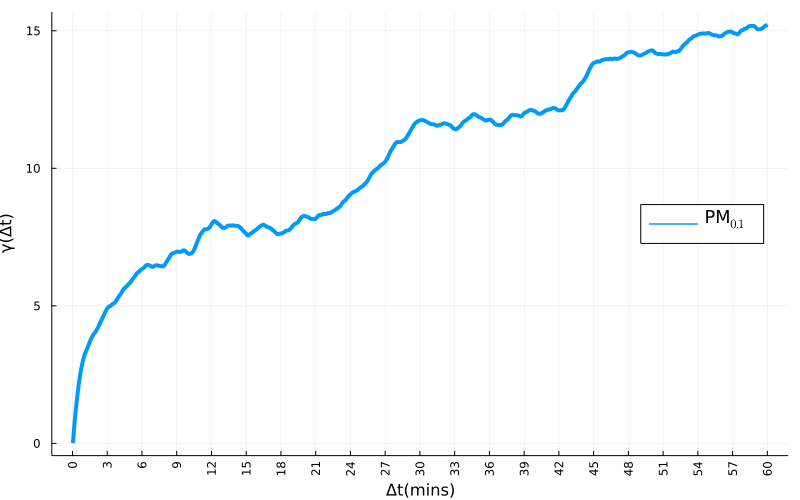

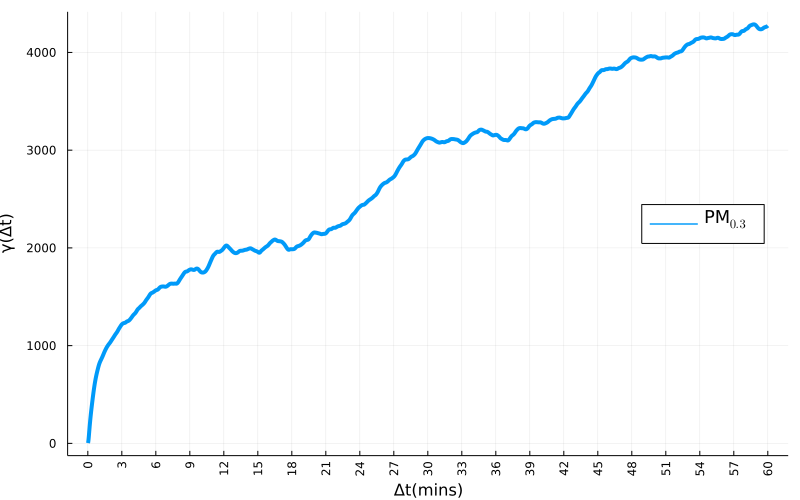

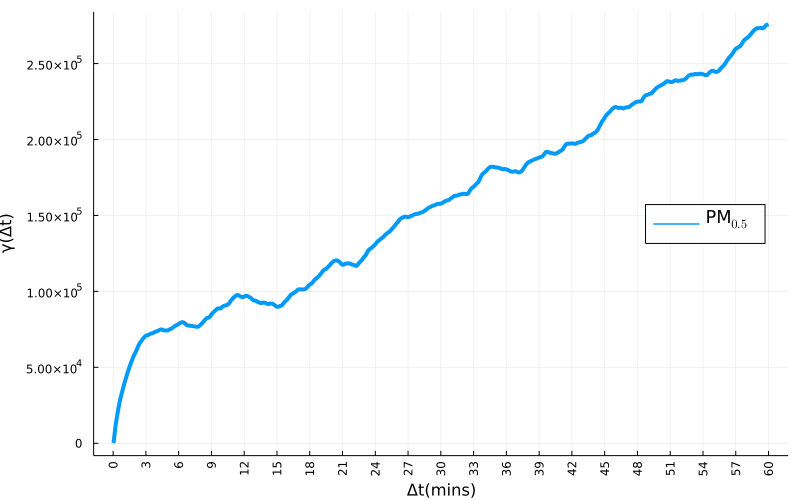

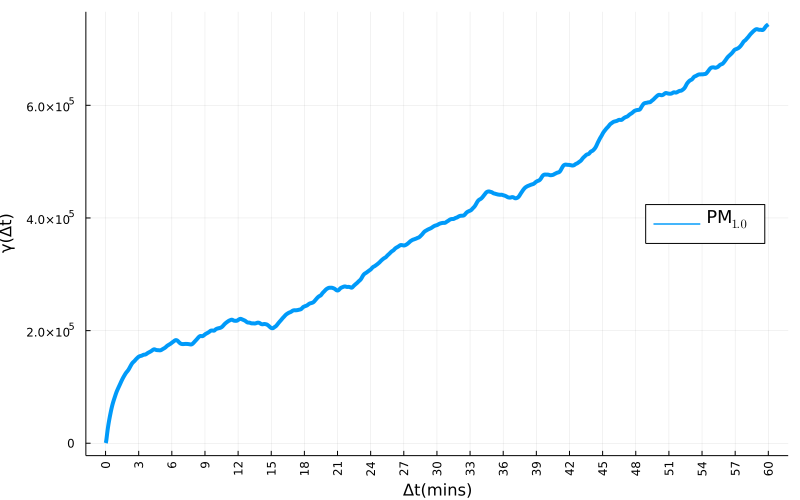

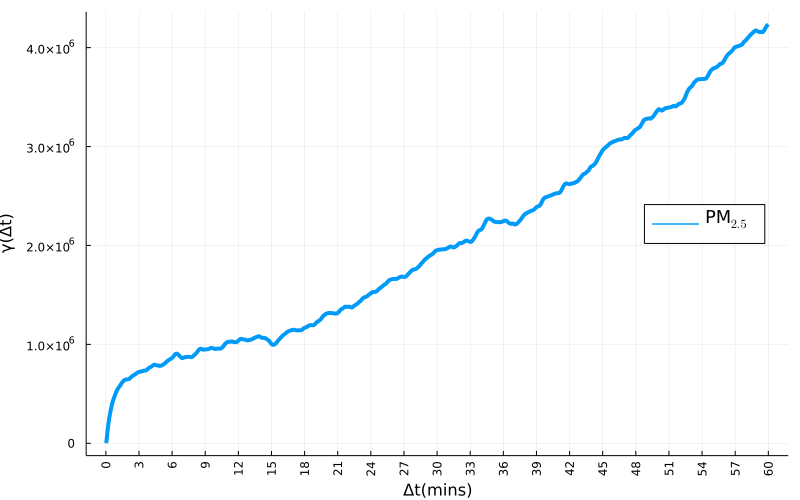

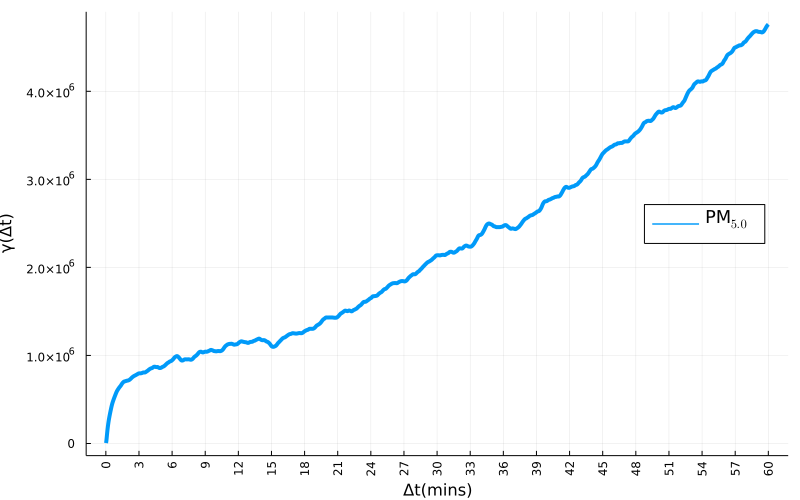

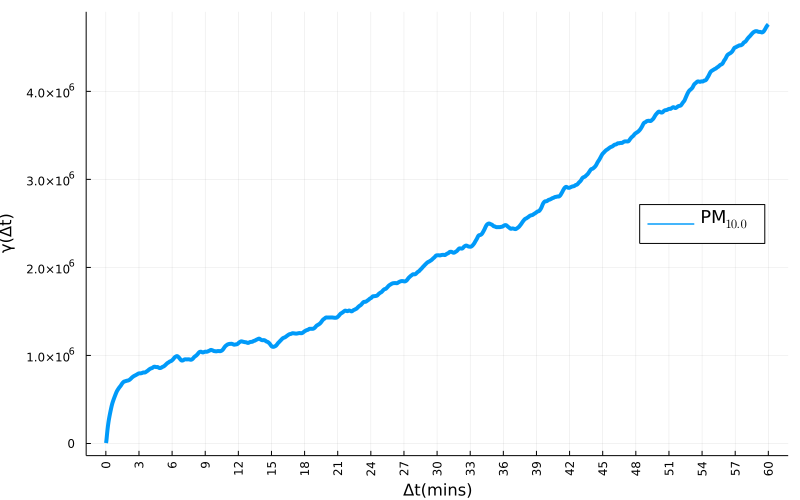

In [79]:
display(plot(γ.Δt,γ.pm0_1, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm0_1, legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt,γ.pm0_3, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm0_3, legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt,γ.pm0_5, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm0_5,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt,γ.pm1_0, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm1_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt,γ.pm2_5, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm2_5,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt,γ.pm5_0, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm5_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))
display(plot(γ.Δt,γ.pm10_0, xlabel = "Δt(mins)" , ylabel = "γ(Δt)", label = strpm10_0,  legend = :right, linewidth=4, legendfontsize=12, xticks= 0:3:120, xrotation = 90,size=(800,500)))